**Importing important libraries**

In [46]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
from scipy.stats import t
from scipy.stats import norm

**Function for calculating sample standard deviation.**

In [13]:
def sample_standard_deviation(sample, sample_size, sample_mean):
    squared_deviation = 0
    for i in range(sample_size):
        deviation = sample[i]-sample_mean
        squared_deviation += deviation**2
    sample_variance = squared_deviation/(sample_size-1)
    return sample_variance**0.5

**Function for calculating t-score**

In [35]:
def calculate_t_score(sample_mean, pop_mean, sample_std, sample_size):
    numerator = sample_mean - pop_mean
    denominator = sample_std/(sample_size**0.5)
    return numerator/denominator

# Hypothesis Testing Steps

*Step - 1:*

Alternate Hypothesis (Bold claim): $ H_1 \ \Rightarrow  >,  <, \ \neq  $

Null Hypothesis (Status Quo): $ H_0 \ \Rightarrow \ \leq, \ \geq, \ = $

*Step - 2:*

Collect a sample of size n

Compute the mean from this sample $ \bar{x} $

*Step - 3: Compute Test Statistic:*

*If population variance is known* $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

If population variance is unknown $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

*Step - 4:* 

Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.

*Step - 5.1:*

Apply decision rule:

*If test statistic is z-score -*

Two tailed z-test: $$ |z| > z_\frac{\alpha}{2} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$
Right tailed z-test:$$ z > z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
Left tailed z-test:$$ z < -z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$


*If test statistic is t-score*

Two tailed t-test: $$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
Right tailed t-test:$$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
Left tailed t-test:$$ t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$


*Step - 5.2: Compute p-value $ P(Test \ Statistics | H_0) $*

For two tailed test:$$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
For one tailed test:$$ p \ value = (1.0 - cdf(test \ statistic)) $$Now,$$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

**Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?**


Step - 1:
Alternate Hypothesis (Bold claim):$$ H_1: \mu \neq 500 $$
 
Null Hypothesis (Status Quo):$$ H_0: \mu = 500 $$

Step - 2:

Collect a sample of size n = 10$$ [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] $$

Compute sample mean$$ \bar{x} \ = \ ? $$
Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x} - \mu}{S/\sqrt[2]{n}}$$

Step - 4: Decide $ \alpha $ or significance level = 0.05

Step - 5.1: Two tailed t-test:

$$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [17]:
# sample and population mean is given

sample = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] 
population_mean = 500

In [5]:
# calculatin sample size

sample_size = len(sample)
sample_size

10

In [3]:
# calculating sample mean

sample_mean = sum(sample)/len(sample)
sample_mean

465.3

In [14]:
# calculating sample std deviation

sample_std_deviation = sample_standard_deviation(sample, sample_size ,sample_mean)
sample_std_deviation

86.84859110991827

In [39]:
# Calculating t-score

t_score = calculate_t_score(sample_mean, population_mean, sample_std_deviation, sample_size)
t_score

-1.2634751284446715

In [38]:
# Two Tail - Calculating the t-critical value

confidence_interval = 0.95

alpha = 1-confidence_interval

df = sample_size - 1 

t_critical = t.ppf(1-alpha/2, df)
t_critical

2.2621571627409915

Text(465.3, 0.0007, 'x_bar')

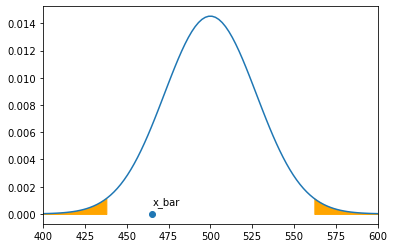

In [53]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean = population_mean
std = sample_std_deviation / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = mean + (-t_critical * std)
t_critical_right = mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


# In this case sample mean falls in the rejection region
# i.e. here we reject the Null Hypothesis

In [54]:
# Conclusion using t test

if abs(t_score)>t_critical:
    print('Reject Null Hypothesis')
else:
    print('Fail to reject Null Hypothesis')

Fail to reject Null Hypothesis


**Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?**

Step - 1:
Alternate Hypothesis (Bold claim):$$ H_1: \mu > 4 $$
 
Null Hypothesis (Status Quo):$$ H_0: \mu \leq 4 $$

Step - 2:

Collect a sample of size n = 20$$ [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] $$


Compute sample mean$$ \bar{x} \ = \ ? $$
Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x} - \mu}{S/\sqrt[2]{n}}$$

Step - 4: Decide $ \alpha $ or significance level = 0.05

Step - 5.1: Right tailed t-test:

$$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [58]:
# sample and population mean is given

sample = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5] 
population_mean = 4

In [59]:
# calculatin sample size

sample_size = len(sample)
sample_size

20

In [61]:
# calculating sample mean

sample_mean = sum(sample)/len(sample)
sample_mean

4.25

In [62]:
# calculating sample std deviation

sample_std_deviation = sample_standard_deviation(sample, sample_size ,sample_mean)
sample_std_deviation

0.8506963092234007

In [63]:
# Calculating t-score

t_score = calculate_t_score(sample_mean, population_mean, sample_std_deviation, sample_size)
t_score

1.3142574813455419

In [64]:
# Right Tail t test - Calculating the t-critical value

confidence_interval = 0.95

alpha = 1-confidence_interval

df = sample_size - 1 

t_critical = t.ppf(1-alpha, df)
t_critical

1.729132811521367

Text(4.25, 0.0007, 'x_bar')

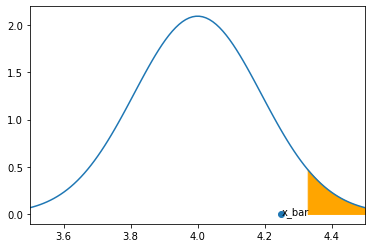

In [65]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5


# Defining the sampling distribution mean and sampling distribution std
mean = population_mean
std = sample_std_deviation / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing t-critical right value (right tailed Test)
t_critical_right = mean + (t_critical * std)


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


# In this case sample mean falls in the rejection region
# i.e. here we reject the Null Hypothesis

In [66]:
# Conclusion using t test

if t_score>t_critical:
    print('Reject Null Hypothesis')
else:
    print('Fail to reject Null Hypothesis')

Fail to reject Null Hypothesis


**Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?**

Step - 1:
Alternate Hypothesis (Bold claim):$$ H_1: \mu > 15 $$
 
Null Hypothesis (Status Quo):$$ H_0: \mu \leq 15 $$

Step - 2:

Collect a sample of size n = 20$$ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] $$


Compute sample mean$$ \bar{x} \ = \ ? $$
Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x} - \mu}{S/\sqrt[2]{n}}$$

Step - 4: Decide $ \alpha $ or significance level = 0.05

Step - 5.1: Right tailed t-test:

$$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [67]:
# sample and population mean is given

sample = [14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,\
          13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]
population_mean = 15

In [69]:
# calculatin sample size

sample_size = len(sample)
sample_size

20

In [70]:
# calculating sample mean

sample_mean = sum(sample)/len(sample)
sample_mean

15.098999999999998

In [71]:
# calculating sample std deviation

sample_std_deviation = sample_standard_deviation(sample, sample_size ,sample_mean)
sample_std_deviation

1.0253671999517255

In [72]:
# Calculating t-score

t_score = calculate_t_score(sample_mean, population_mean, sample_std_deviation, sample_size)
t_score

0.4317882018907916

In [73]:
# Right Tail t test - Calculating the t-critical value

confidence_interval = 0.95

alpha = 1-confidence_interval

df = sample_size - 1 

t_critical = t.ppf(1-alpha, df)
t_critical

1.729132811521367

Text(15.098999999999998, 0.07, 'x_bar')

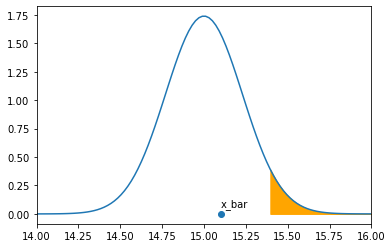

In [80]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 14
x_max = 16


# Defining the sampling distribution mean and sampling distribution std
mean = population_mean
std = sample_std_deviation / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing t-critical right value (right tailed Test)
t_critical_right = mean + (t_critical * std)


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.07))


# In this case sample mean falls in the rejection region
# i.e. here we reject the Null Hypothesis

In [81]:
# Conclusion using Right t test

if t_score>t_critical:
    print('Reject Null Hypothesis')
else:
    print('Fail to reject Null Hypothesis')

Fail to reject Null Hypothesis


**Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?(S = 7)**

Step - 1:
Alternate Hypothesis (Bold claim):$$ H_1: \mu < 100 $$
 
Null Hypothesis (Status Quo):$$ H_0: \mu \geq 15 $$

Step - 2:

Collect a sample of size n = 100


Compute sample mean$$ \bar{x} \ = \ ? $$
Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x} - \mu}{S/\sqrt[2]{n}}$$

Step - 4: Decide $ \alpha $ or significance level = 0.05

Step - 5.1: left tailed t-test:

$$ t < t_{n-1,\alpha} \rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [85]:
# Sample size, sample mean, population mean and sample std deviation is given

sample_size = 100
sample_mean = 97.5
population_mean = 100
sample_std_deviation = 7

In [86]:
# Calculating t-score

t_score = calculate_t_score(sample_mean, population_mean, sample_std_deviation, sample_size)
t_score

-3.5714285714285716

In [91]:
# Calculating the left t-critical value

confidence_interval = 0.95

alpha = 1-confidence_interval

df = sample_size - 1 

t_critical = t.ppf(1-alpha, df)
t_critical

1.6603911559963895

Text(97.5, 0.0007, 'x_bar')

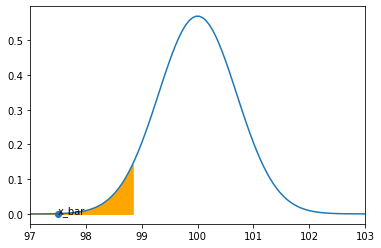

In [94]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 97
x_max = 103


# Defining the sampling distribution mean and sampling distribution std
mean = population_mean
std = sample_std_deviation / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing left t-critical(left tailed Test)
t_critical_left = mean + (-t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


# In this case sample mean falls in the rejection region
# i.e. here we reject the Null Hypothesis

In [95]:
# Conclusion using left tail test

if t_score<-t_critical:
    print('Reject Null Hypothesis')
else:
    print('Fail to reject Null Hypothesis')

Reject Null Hypothesis
